In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [22]:
df=pd.read_excel("276A_Temp.xlsx")

In [23]:
df.head()

,Date,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
0,2020-01-15 01:44:00,71.5,59.25,68,2020-01-14 01:44:00,71.0,2020-01-13 01:44:00,72.7
1,2020-01-15 03:44:00,71.8,59.25,66,2020-01-14 03:44:00,71.4,2020-01-13 03:44:00,72.8
2,2020-01-15 05:44:00,72.1,59.45,68,2020-01-14 05:44:00,71.6,2020-01-13 05:44:00,72.9
3,2020-01-15 07:44:00,70.7,61.04,72,2020-01-14 07:44:00,70.3,2020-01-13 07:44:00,71.8
4,2020-01-15 09:44:00,70.9,60.22,75,2020-01-14 09:44:00,70.4,2020-01-13 09:44:00,71.2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 8 columns):
Date                           384 non-null datetime64[ns]
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Previous Date                  384 non-null datetime64[ns]
Temperature on Previous day    384 non-null float64
2 days before Date             384 non-null datetime64[ns]
Temperature 2 days before      384 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(1)
memory usage: 24.1 KB


In [25]:
#df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [26]:
df.head()

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-01-15 01:44:00,71.5,59.25,68,2020-01-14 01:44:00,71.0,2020-01-13 01:44:00,72.7
2020-01-15 03:44:00,71.8,59.25,66,2020-01-14 03:44:00,71.4,2020-01-13 03:44:00,72.8
2020-01-15 05:44:00,72.1,59.45,68,2020-01-14 05:44:00,71.6,2020-01-13 05:44:00,72.9
2020-01-15 07:44:00,70.7,61.04,72,2020-01-14 07:44:00,70.3,2020-01-13 07:44:00,71.8
2020-01-15 09:44:00,70.9,60.22,75,2020-01-14 09:44:00,70.4,2020-01-13 09:44:00,71.2


In [27]:
df.dropna(inplace=True)

In [28]:
df[df['Temperature on Previous day']<30]

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-01-17 17:44:00,70.0,58.52,68,2020-01-16 17:44:00,0.1,2020-01-15 17:44:00,71.2
2020-01-20 07:44:00,70.9,36.18,47,2020-01-19 07:44:00,0.1,2020-01-18 07:44:00,72.6
2020-01-22 21:44:00,70.3,39.07,48,2020-01-21 21:44:00,0.1,2020-01-20 21:44:00,69.5


In [29]:
df.loc['2020-01-20 07:44:00','Temperature on Previous day']=(df.loc['2020-01-20 05:44:00','Temperature on Previous day']+df.loc['2020-01-20 09:44:00','Temperature on Previous day'])/2

In [30]:
df.loc['2020-01-17 17:44:00','Temperature on Previous day']=(df.loc['2020-01-17 15:44:00','Temperature on Previous day']+df.loc['2020-01-17 19:44:00','Temperature on Previous day'])/2

In [31]:
df.loc['2020-01-22 21:44:00','Temperature on Previous day']=(df.loc['2020-01-22 19:44:00','Temperature on Previous day']+df.loc['2020-01-22 23:44:00','Temperature on Previous day'])/2

In [32]:
df.loc['2020-01-22 21:44:00']['Temperature on Previous day']

70.1

In [33]:
df[df['Temperature 2 days before']<30]

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,
2020-01-18 17:44:00,71.5,62.24,66,2020-01-17 17:44:00,70.0,2020-01-16 17:44:00,0.1
2020-01-21 07:44:00,69.5,33.95,42,2020-01-20 07:44:00,70.9,2020-01-19 07:44:00,0.1
2020-01-23 21:44:00,70.5,51.20,54,2020-01-22 21:44:00,70.3,2020-01-21 21:44:00,0.1


In [34]:
df.loc['2020-01-21 07:44:00','Temperature 2 days before']=(df.loc['2020-01-21 05:44:00','Temperature 2 days before']+df.loc['2020-01-21 09:44:00','Temperature 2 days before'])/2

In [35]:
df.loc['2020-01-18 17:44:00','Temperature 2 days before']=(df.loc['2020-01-18 15:44:00','Temperature 2 days before']+df.loc['2020-01-18 19:44:00','Temperature 2 days before'])/2

In [36]:
df.loc['2020-01-23 21:44:00','Temperature 2 days before']=(df.loc['2020-01-23 19:44:00','Temperature 2 days before']+df.loc['2020-01-23 23:44:00','Temperature 2 days before'])/2

In [37]:
df[df['Temperature 2 days before']<30]

,Temperature,Humidity,Outside Temperature,Previous Date,Temperature on Previous day,2 days before Date,Temperature 2 days before
Date,,,,,,,


In [38]:
ts=df.loc['1/15/2020':'2/15/2020',['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
#ts=pd.concat([df.loc['1/20/2020':'1/24/2020'],df.loc['1/27/2020':'1/31/2020']])[['Temperature','Humidity','Outside Temperature','Temperature on Previous day','Temperature 2 days before']]
ts.head()

,Temperature,Humidity,Outside Temperature,Temperature on Previous day,Temperature 2 days before
Date,,,,,
2020-01-15 01:44:00,71.5,59.25,68,71.0,72.7
2020-01-15 03:44:00,71.8,59.25,66,71.4,72.8
2020-01-15 05:44:00,72.1,59.45,68,71.6,72.9
2020-01-15 07:44:00,70.7,61.04,72,70.3,71.8
2020-01-15 09:44:00,70.9,60.22,75,70.4,71.2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


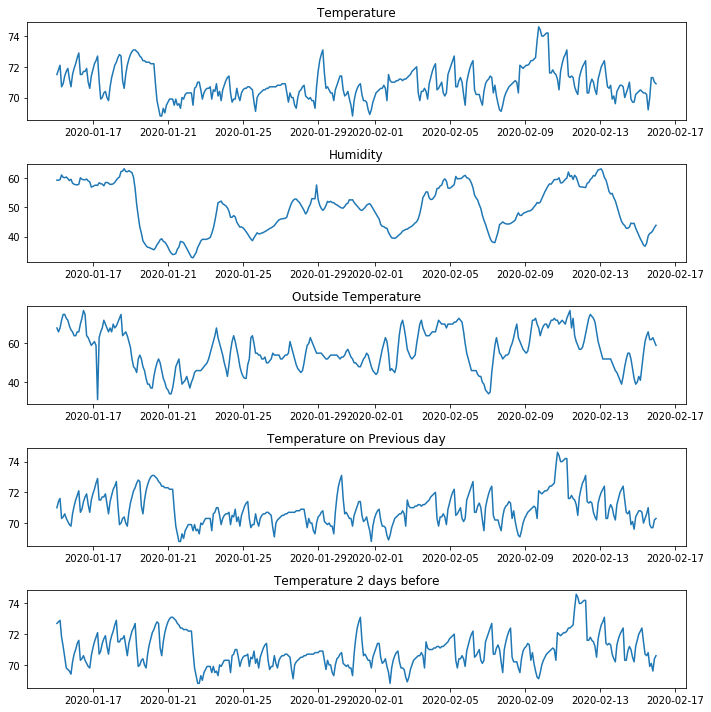

In [39]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(10,10))
ax1.plot(ts['Temperature'])
ax1.set_title('Temperature')
ax2.plot(ts['Humidity'])
ax2.set_title('Humidity')
ax3.plot(ts['Outside Temperature'])
ax3.set_title('Outside Temperature')
ax4.plot(ts['Temperature on Previous day'])
ax4.set_title('Temperature on Previous day')
ax5.plot(ts['Temperature 2 days before'])
ax5.set_title('Temperature 2 days before')
plt.tight_layout()

In [40]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [41]:
grangers_causation_matrix(ts,ts.columns)

,Temperature_x,Humidity_x,Outside Temperature_x,Temperature on Previous day_x,Temperature 2 days before_x
Temperature_y,1.0000,0.0082,0.0,0.0,0.0000
Humidity_y,0.0006,1.0000,0.0,0.0,0.0053
Outside Temperature_y,0.0004,0.0054,1.0,0.0,0.0000
Temperature on Previous day_y,0.0000,0.0028,0.0,1.0,0.0000
Temperature 2 days before_y,0.0000,0.0000,0.0,0.0,1.0000


In [42]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [43]:
cointegration_test(ts)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Temperature ::  174.8     > 60.0627   =>   True
Humidity ::  111.68    > 40.1749   =>   True
Outside Temperature ::  57.71     > 24.2761   =>   True
Temperature on Previous day ::  13.61     > 12.3212   =>   True
Temperature 2 days before ::  0.0       > 4.1296    =>   False


In [44]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2020-01-15 01:44:00 to 2020-02-15 23:44:00
Data columns (total 5 columns):
Temperature                    384 non-null float64
Humidity                       384 non-null float64
Outside Temperature            384 non-null int64
Temperature on Previous day    384 non-null float64
Temperature 2 days before      384 non-null float64
dtypes: float64(4), int64(1)
memory usage: 18.0 KB


In [45]:
nobs = 96
ts_train, ts_test = ts[0:-nobs], ts[-nobs:]

# Check size
print(ts_train.shape) 
print(ts_test.shape)  

(288, 5)
(96, 5)


In [46]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [47]:
for name, column in ts_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.0126
 No. Lags Chosen       = 15
 Critical value 1%     = -3.455
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0013. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Humidity" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0311
 No. Lags Chosen       = 2
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0321. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Outside Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationar

In [48]:
#ts_differenced = ts_train.diff().dropna()

In [49]:
#ts_differenced.head()

In [50]:
# for name, column in ts_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [51]:
model = VAR(ts)
x = model.select_order(maxlags=20)
x.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 2H will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,7.985,8.038,2936.,8.006
1,-1.885,-1.564,0.1518,-1.757
2,-2.125,-1.536,0.1195,-1.891
3,-2.126,-1.269,0.1194,-1.785
4,-2.147,-1.023,0.1169,-1.700
5,-2.181,-0.7890,0.1131,-1.628
6,-2.346,-0.6868,0.09592,-1.687
7,-2.367,-0.4395,0.09410,-1.601
8,-2.434,-0.2394,0.08809,-1.562
9,-2.457,0.005833,0.08631,-1.478


In [52]:
model_fitted = model.fit(13)
model_fitted.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, May, 2020
Time:                     20:37:09
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -62.9136
Nobs:                     371.000    HQIC:                  -65.0135
Log likelihood:           10014.5    FPE:                1.48749e-29
AIC:                     -66.3970    Det(Omega_mle):     6.56019e-30
--------------------------------------------------------------------
Results for equation Temperature
                                     coefficient         std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                  11.795098           4.166408            2.831           0.005
L1.Temperature                          0.907042           0.059216        

In [53]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(ts.columns, out):
    print(col, ':', round(val, 2))

Temperature : 1.99
Humidity : 2.0
Outside Temperature : 2.0
Temperature on Previous day : 2.02
Temperature 2 days before : 0.02


In [54]:
lag_order = model_fitted.k_ar
print(lag_order)

13


In [55]:
forecast_input = ts.values[-lag_order:]
forecast_input

array([[70.3 , 41.68, 40.  , 70.6 , 71.6 ],
       [70.4 , 40.39, 43.  , 70.8 , 72.  ],
       [70.5 , 39.26, 41.  , 70.8 , 72.2 ],
       [70.4 , 38.27, 48.  , 70.7 , 72.4 ],
       [70.3 , 37.13, 55.  , 70.  , 71.5 ],
       [70.3 , 36.73, 61.  , 70.3 , 70.7 ],
       [70.2 , 37.75, 64.  , 70.6 , 70.6 ],
       [69.2 , 40.21, 66.  , 71.  , 70.8 ],
       [70.  , 41.11, 62.  , 69.9 , 69.9 ],
       [71.3 , 41.38, 62.  , 69.7 , 70.1 ],
       [71.3 , 42.09, 63.  , 69.7 , 69.6 ],
       [71.  , 43.1 , 61.  , 70.2 , 70.4 ],
       [70.9 , 43.87, 59.  , 70.3 , 70.6 ]])

In [56]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ts_forecast = pd.DataFrame(fc, index=ts.index[-nobs:], columns=ts.columns + '_1d')
ts_forecast.shape

(96, 5)

In [57]:
# def invert_transformation(df_train, df_forecast, second_diff=False):
#     """Revert back the differencing to get the forecast to original scale."""
#     df_fc = df_forecast.copy()
#     columns = df_train.columns
#     for col in columns:        
#         # Roll back 2nd Diff
#         if second_diff:
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
#         # Roll back 1st Diff
#         df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
#     return df_fc

In [58]:
#ts_results = invert_transformation(ts_train,ts_forecast, second_diff=False)
#ts_results.loc[:,['Temperature_forecast', 'Humidity_forecast', 'Outside Temperature_forecast','Temperature on Previous day_forecast','Temperature 2 days before_forecast']]        

In [59]:
# fig, axes = plt.subplots(nrows=int(len(ts.columns)/2), ncols=2, dpi=150, figsize=(10,10))
# for i, (col,ax) in enumerate(zip(ts.columns, axes.flatten())):
#     ts_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
#     ts_test[col][-nobs:].plot(legend=True, ax=ax);
#     ax.set_title(col + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

# plt.tight_layout();

Text(0, 0.5, 'Temperature (F)')

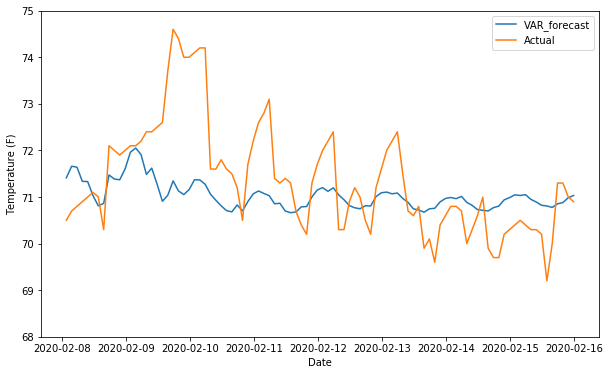

In [60]:
fig= plt.figure(figsize=(10,6))
#plt.plot(ts_results['Temperature_forecast'],label='VAR_forecast')
plt.plot(ts_forecast['Temperature_1d'],label='VAR_forecast')
plt.plot(ts_test['Temperature'],label='Actual')
plt.legend(loc="upper right")
plt.ylim(68,75)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')

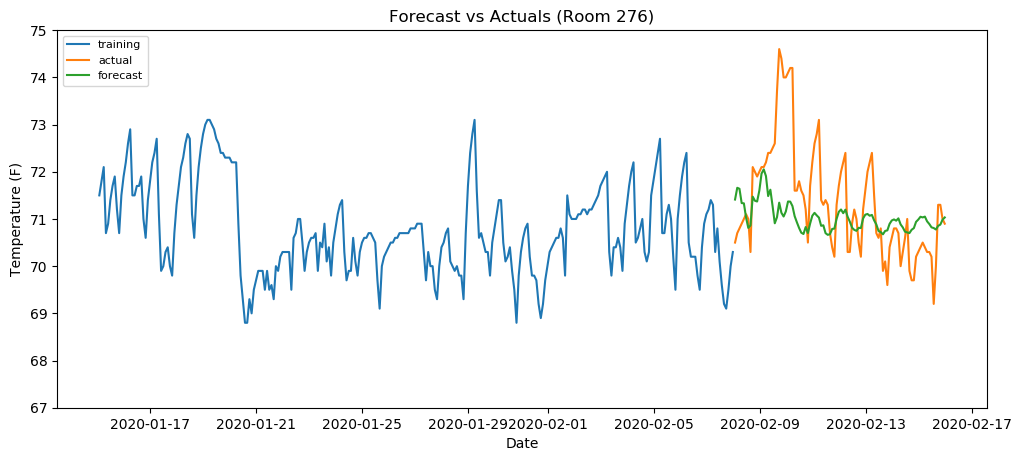

In [61]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts_train['Temperature'], label='training')
plt.plot(ts_test['Temperature'], label='actual')
plt.plot(ts_forecast['Temperature_1d'], label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals (Room 276)')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.ylim(67,75)
plt.show()

In [62]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [63]:
# print('Forecast Accuracy of: Temperature')
# accuracy_prod = forecast_accuracy(ts_results['Temperature_forecast'].values, ts_test['Temperature'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

In [64]:
print('Forecast Accuracy of: Temperature')
accuracy_prod = forecast_accuracy(ts_forecast['Temperature_1d'].values, ts_test['Temperature'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Temperature
mape :  0.0115
me :  -0.3246
mae :  0.8275
mpe :  -0.0043
rmse :  1.1167
corr :  0.4714
minmax :  0.0114
